## k-means

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [3]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [4]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster.iloc[:, 0].values, y=label_cluster.iloc[:, 1].values, s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

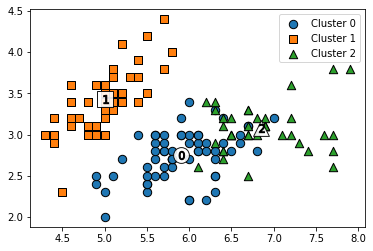

In [5]:
visualize_cluster_plot(kmeans, irisDF, 'cluster', iscenter=True)

## 실루엣 계수

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
irisDF['silhouette_coeff'] = score_samples
irisDF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852955
1,4.9,3.0,1.4,0.2,0,1,0.815495
2,4.7,3.2,1.3,0.2,0,1,0.829315
3,4.6,3.1,1.5,0.2,0,1,0.805014
4,5.0,3.6,1.4,0.2,0,1,0.849302


In [7]:
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 평균 실루엣 계수:{0:.3f}'.format(average_score))

붓꽃 데이터셋 평균 실루엣 계수:0.553


In [8]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

def silhouette_clst(n):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300,random_state=0).fit(irisDF.iloc[:,:4])
    irisDF['cluster']=kmeans.labels_
    score_samples = silhouette_samples(iris.data, irisDF['cluster'])
    irisDF['silhouette_coeff'] = score_samples
    average_score = silhouette_score(iris.data, irisDF['cluster'])
    print('붓꽃 데이터셋 평균 실루엣 계수:{0:.3f}'.format(average_score))
    print(irisDF.groupby('cluster')['silhouette_coeff'].mean())
    
    y_lower=10
    for i in range(n):
        ith_cluster_sil_values = irisDF.loc[irisDF['cluster']==i]['silhouette_coeff'].values
        ith_cluster_sil_values.sort()
        
        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i
            
        color = cm.nipy_spectral(float(i) / n)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
            
    plt.axvline(x=average_score, color="red", linestyle="--")
    plt.show()
    

붓꽃 데이터셋 평균 실루엣 계수:0.681
cluster
0    0.769526
1    0.632701
Name: silhouette_coeff, dtype: float64


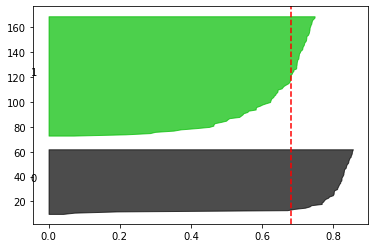

In [10]:
silhouette_clst(2)

붓꽃 데이터셋 평균 실루엣 계수:0.498
cluster
0    0.419518
1    0.763176
2    0.321324
3    0.362998
Name: silhouette_coeff, dtype: float64


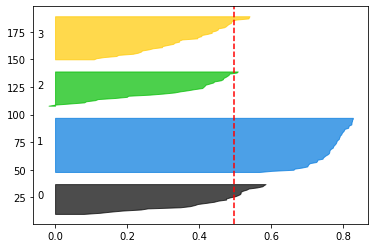

In [11]:
silhouette_clst(4)

## 평균이동

In [12]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


In [13]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [14]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2)
print('최적의 bandwidth값:', round(bandwidth,3))

최적의 bandwidth값: 1.444


## GMM

In [15]:
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [16]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

gmm_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [17]:
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


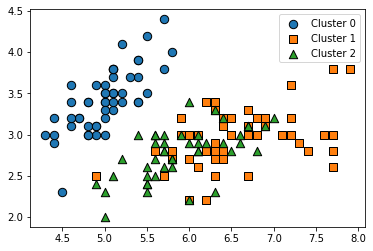

In [18]:
visualize_cluster_plot(gmm, irisDF, 'gmm_cluster', iscenter=False)